## Develop approach to examine oxygen-percentiles

Following [Sohail et al. (2022)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020GL091439). **NOTE : need to check how to incorporate compressibility, i.e. use of *in situ* density.**

Ocean volume bounded by surfaces of tracer $\phi$:
$$\mathcal{V}(\phi^*,t) = \iiint_{\phi(x,y,z,t)>\phi^*}dxdydz$$
Tracer content/inventory ($\phi$) bounded by surface of tracer $\phi$:
$$\Phi(\phi^*,t) = \int_0^{\mathcal{V}(\phi^*,t)}\rho(x,y,z,t)\,\phi(x,y,z,t)d\mathcal{V}$$
Bounding tracer value of volume $\mathcal{V}$:
$$\mathcal{V}(\phi^*,t)\Leftrightarrow \phi^{\mathcal{V}}(\mathcal{V},t)$$
Tracer-percentile:
$$p(\phi^*,t) = 100*\mathcal{V}(\phi^*,t)/V_T$$
Tracer inventory as a function of tracer-percentile is:
$$\Phi(p,t) = 0.01V_T\int_0^p\rho(p,t)\phi^p(p,t)dp$$
where $\phi^p(p,t) \equiv \phi^{\mathcal{V}}(\mathcal{V},t)$ at $\mathcal{V}=0.01 \times p \times V_T$

In [1]:
import xarray as xr
import cftime
from xhistogram.xarray import histogram
import numpy as np
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt

from tracerpercentile import *

### READ

In [2]:
config_id = 'ESM4_historical_D1'
ds_datadir = '/work/gam/projects/oxygen/data/'
ds_filename = 'ds.'+config_id+'.zarr'
ds = xr.open_zarr(ds_datadir+ds_filename)

### CALCULATE

In [14]:
tracer = ds['o2']
volume = ds['volcello']
tracer_bins = np.linspace(0,0.4,400)
percentiles = np.linspace(1,100,100)
tp,VT = calc_tracerpercentile(tracer = tracer,
                              volume = volume,
                              tracer_bins=tracer_bins,
                              percentiles=percentiles,
                              ascending=False)
Tp = calc_extensive(tp,VT.mean('time'))

Loading volumetric histogram.
Inverting for tracer percentile at each time.


### PLOT

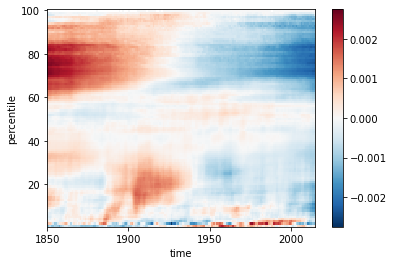

In [15]:
(tp-tp.mean('time')).plot()

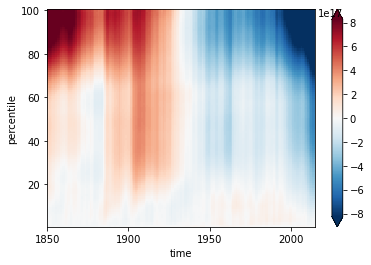

In [16]:
(Tp-Tp.mean('time')).plot(robust=True)

In [17]:
t1 = ['2000','2004']
t2 = ['2010','2014']
t1slice = slice(t1[0]+'-01-01',t1[1]+'-12-31')
t2slice = slice(t2[0]+'-01-01',t2[1]+'-12-31')
t1label = t1[0]+' to '+t1[1]
t2label = t2[0]+' to '+t2[1]
t1color='tab:blue'
t2color='tab:orange'
dt = cftime.datetime(int(t2[1]),12,31)-cftime.datetime(int(t1[1]),12,31)
dt = dt.days*24*60*60

In [18]:
tp_t1 = tp.sel(time=t1slice).mean('time')
tp_t2 = tp.sel(time=t2slice).mean('time')
Tp_t1 = Tp.sel(time=t1slice).mean('time')
Tp_t2 = Tp.sel(time=t2slice).mean('time')

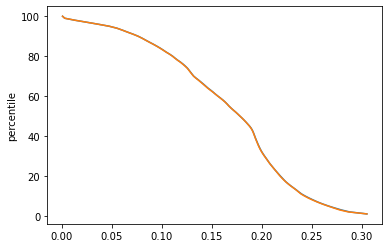

In [19]:
tp_t1.plot(y='percentile')
tp_t2.plot(y='percentile')

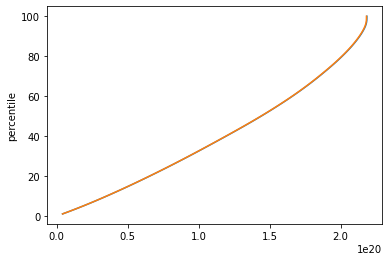

In [20]:
Tp_t1.plot(y='percentile')
Tp_t2.plot(y='percentile')

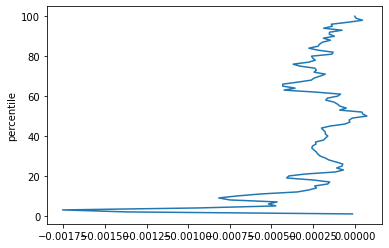

In [21]:
(tp_t2-tp_t1).plot(y='percentile')

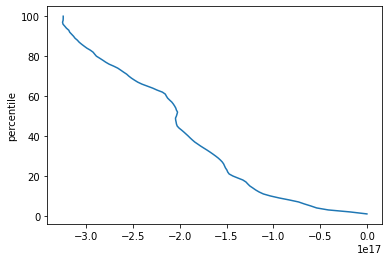

In [22]:
(Tp_t2-Tp_t1).plot(y='percentile')